## Read Data

In [1]:
import pandas as pd

# Excel file path
file_path = 'C:/Users/muge/Dropbox/GMU/DAEN 690/Data/DAEN_690_Inference_CAD.xlsx'

# Dictionary to store DataFrames
dfs = {}

# List of sheet names
sheet_names = [
    'ResNet18_20_250_372V946_INF250',
    'Resnet18_50_250_336V945_INF250',
    'ResNet50_20_250_337V945_INF250',
    'ResNet50_50_250_338V945_INF250',
    'Incep20_250_343V945_INF250',
    'Incep50_250_367V945_INF250',
    'ResNet18_20_500_406V948_IN250',
    'ResNet18_50_500_407V948_INF250',
    'ResNet50_20_500_408V948_INF250',
    'ResNet50_50_500_409V948_INF250',
    'Incep20_500_410V948_INF250',
    'Incep50_500_411V948_INF250',
    'ResNet18_20_1000_445V955_INF250',
    'ResNet18_50_1000_446V955_INF250',
    'ResNet50_20_1000_447V955_INF250',
    'ResNet50_50_1000_468V956_INF250',
    'Incep20_1000_462V955_INF250',
    'Incep50_1000_460V955_INF250',
]

# Read each sheet into a DataFrame
for sheet_name in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dfs[sheet_name] = df

# Access each DataFrame by sheet name
for sheet_name, df in dfs.items():
    print(f"Data from sheet '{sheet_name}':")
    #print(df)

Data from sheet 'ResNet18_20_250_372V946_INF250':
Data from sheet 'Resnet18_50_250_336V945_INF250':
Data from sheet 'ResNet50_20_250_337V945_INF250':
Data from sheet 'ResNet50_50_250_338V945_INF250':
Data from sheet 'Incep20_250_343V945_INF250':
Data from sheet 'Incep50_250_367V945_INF250':
Data from sheet 'ResNet18_20_500_406V948_IN250':
Data from sheet 'ResNet18_50_500_407V948_INF250':
Data from sheet 'ResNet50_20_500_408V948_INF250':
Data from sheet 'ResNet50_50_500_409V948_INF250':
Data from sheet 'Incep20_500_410V948_INF250':
Data from sheet 'Incep50_500_411V948_INF250':
Data from sheet 'ResNet18_20_1000_445V955_INF250':
Data from sheet 'ResNet18_50_1000_446V955_INF250':
Data from sheet 'ResNet50_20_1000_447V955_INF250':
Data from sheet 'ResNet50_50_1000_468V956_INF250':
Data from sheet 'Incep20_1000_462V955_INF250':
Data from sheet 'Incep50_1000_460V955_INF250':


In [2]:
# Read all sheets into a list of DataFrames
dfs = [pd.read_excel(file_path, sheet_name=sheet_name) for sheet_name in sheet_names]

# Concatenate all DataFrames vertically
merged_df = pd.concat(dfs, ignore_index=True)

# Display the merged DataFrame
# print(merged_df)

## Explore Data

#### Check Data Types

In [3]:
print("Columns:")
print(merged_df.columns)

print("\nData Types:")
print(merged_df.dtypes)

Columns:
Index(['MODEL_VERSION', 'ACTUAL_DATASET_ID', 'IMAGE_NAME',
       'PREDICTED_DATASET_ID', 'CONFIDENCE', 'REQUEST_ID', 'MODEL_ID',
       'MODEL_NAME', 'TYPE', 'ACTUAL_IMAGE', 'PREDICTED_IMAGE', 'MATCH'],
      dtype='object')

Data Types:
MODEL_VERSION            int64
ACTUAL_DATASET_ID        int64
IMAGE_NAME              object
PREDICTED_DATASET_ID     int64
CONFIDENCE               int64
REQUEST_ID              object
MODEL_ID                 int64
MODEL_NAME              object
TYPE                    object
ACTUAL_IMAGE            object
PREDICTED_IMAGE         object
MATCH                   object
dtype: object


In [4]:
# Convert numerical columns into proper data types
df['MODEL_VERSION'] = df['MODEL_VERSION'].astype('Int64')
df['ACTUAL_DATASET_ID'] = df['ACTUAL_DATASET_ID'].astype('Int64')
df['PREDICTED_DATASET_ID'] = df['PREDICTED_DATASET_ID'].astype('Int64')
df['CONFIDENCE'] = df['CONFIDENCE'].astype('Int64')
df['MODEL_ID'] = df['MODEL_ID'].astype('Int64')

# Display the data types to confirm the conversion
print(df.dtypes)

MODEL_VERSION            Int64
ACTUAL_DATASET_ID        Int64
IMAGE_NAME              object
PREDICTED_DATASET_ID     Int64
CONFIDENCE               Int64
REQUEST_ID              object
MODEL_ID                 Int64
MODEL_NAME              object
TYPE                    object
ACTUAL_IMAGE            object
PREDICTED_IMAGE         object
MATCH                   object
dtype: object


##### Distinct Values within Variables

In [5]:
# Group by 'model_name' and aggregate 'model_version' using set to get distinct values
distinct_versions = merged_df.groupby('MODEL_NAME')['MODEL_VERSION'].agg(lambda x: set(x))

# Print distinct model_version values for each model_name
for model_name, versions in distinct_versions.items():
    print(f"Model Name: {model_name}")
    print(f"Distinct Model Versions: {versions}\n")

Model Name: TOT1K
Distinct Model Versions: {406, 407, 408, 409, 410, 411}

Model Name: TOT2K
Distinct Model Versions: {460, 462, 445, 446, 447}

Model Name: TOT2K_2
Distinct Model Versions: {468}

Model Name: TOT500
Distinct Model Versions: {367, 336, 337, 338, 343}

Model Name: TOT500_2
Distinct Model Versions: {372}



In [6]:
# Group by 'model_name' and aggregate 'model_version' using set to get distinct values
distinct_versions = merged_df.groupby('MODEL_NAME')['MODEL_ID'].agg(lambda x: set(x))

# Print distinct model_version values for each model_name
for model_name, versions in distinct_versions.items():
    print(f"Model Name: {model_name}")
    print(f"Distinct Model IDs: {versions}\n")

Model Name: TOT1K
Distinct Model IDs: {948}

Model Name: TOT2K
Distinct Model IDs: {955}

Model Name: TOT2K_2
Distinct Model IDs: {956}

Model Name: TOT500
Distinct Model IDs: {945}

Model Name: TOT500_2
Distinct Model IDs: {946}



In [7]:
# Iterate over columns
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        # Print column name and distinct values
        print(f"Column: {col}")
        print(merged_df[col].unique())
        print()

Column: IMAGE_NAME
['Positive_Coronary_644_LAD1_5.jpeg' 'Positive_Coronary_708_LAD1_6.jpeg'
 'Positive_Coronary_479_RCA1_2.jpeg' 'Positive_Coronary_454_RCA1_8.jpeg'
 'Positive_Coronary_228_LAD1_1.jpeg'
 'Positive_Coronary_634_RCA_Secondary4_2.jpeg'
 'Positive_Coronary_169_RCA_Secondary1_3.jpeg'
 'Positive_Coronary_449_LAD1_8.jpeg' 'Positive_Coronary_629_CX1_4.jpeg'
 'Positive_Coronary_454_LAD_Secondary1_8.jpeg'
 'Positive_Coronary_493_LAD1_6.jpeg' 'Positive_Coronary_478_LAD1_1.jpeg'
 'Positive_Coronary_054_RCA1_3.jpeg' 'Positive_Coronary_078_LAD1_8.jpeg'
 'Positive_Coronary_020_CX_Secondary3_7.jpeg'
 'Positive_Coronary_220_LAD_Secondary1_2.jpeg'
 'Positive_Coronary_609_RCA1_6.jpeg' 'Positive_Coronary_642_LAD1_8.jpeg'
 'Positive_Coronary_636_RCA1_1.jpeg' 'Positive_Coronary_512_LAD1_6.jpeg'
 'Positive_Coronary_622_CX1_4.jpeg'
 'Positive_Coronary_449_RCA_Secondary2_3.jpeg'
 'Positive_Coronary_026_LAD1_7.jpeg' 'Positive_Coronary_667_LAD1_7.jpeg'
 'Positive_Coronary_632_LAD1_6.jpeg' 'Positi

In [8]:
# Print distinct MODEL_VERSION values
print("Distinct MODEL_VERSION values:")
print(merged_df["MODEL_VERSION"].unique())

Distinct MODEL_VERSION values:
[372 336 337 338 343 367 406 407 408 409 410 411 445 446 447 468 462 460]


### Feature Engineering

#### Create New Variables

In [9]:
# Create a new variable DATASET_SIZE using MODEL_ID column
# Mapping dictionary for MODEL_ID to DATA_SIZE
data_size_mapping = {
    945: 500,
    946: 500,
    948: 1000,
    955: 2000,
    956: 2000
}

# Create new variable DATA_SIZE based on MODEL_ID
merged_df['DATA_SIZE'] = merged_df['MODEL_ID'].map(data_size_mapping)

# Print the first few rows to verify the result
print(merged_df[['MODEL_ID', 'DATA_SIZE']])

      MODEL_ID  DATA_SIZE
0          946        500
1          946        500
2          946        500
3          946        500
4          946        500
...        ...        ...
4495       955       2000
4496       955       2000
4497       955       2000
4498       955       2000
4499       955       2000

[4500 rows x 2 columns]


In [10]:
count_1000 = merged_df[merged_df['DATA_SIZE'] == 1000].shape[0]
print(count_1000)

1500


In [11]:
# Create a new variable CNN_MODEL  and add values as follows using MODEL_VERSION column
# Mapping dictionary for MODEL_VERSION to CNN_MODEL
cnn_model_mapping = {
    372: 'ResNet18',
    336: 'ResNet18',
    337: 'ResNet50',
    338: 'ResNet50',
    343: 'InceptionV3',
    367: 'InceptionV3',
    406: 'ResNet18',
    407: 'ResNet18',
    408: 'ResNet50',
    409: 'ResNet50',
    410: 'InceptionV3',
    411: 'InceptionV3',
    445: 'ResNet18',
    446: 'ResNet18',
    447: 'ResNet50',
    468: 'ResNet50',
    462: 'InceptionV3',
    460: 'InceptionV3'
}

# Create new variable CNN_MODEL based on MODEL_VERSION
merged_df['CNN_MODEL'] = merged_df['MODEL_VERSION'].map(cnn_model_mapping)

# Print the first few rows to verify the result
print(merged_df[['MODEL_VERSION', 'CNN_MODEL']].head())

   MODEL_VERSION CNN_MODEL
0            372  ResNet18
1            372  ResNet18
2            372  ResNet18
3            372  ResNet18
4            372  ResNet18


In [12]:
# Create a new variable EPOCH  and add values as follows using MODEL_VERSION column
# Mapping dictionary for MODEL_VERSION to EPOCH
epoch_mapping = {
    372: 20,
    336: 50,
    337: 20,
    338: 50,
    343: 20,
    367: 50,
    406: 20,
    407: 50,
    408: 20,
    409: 50,
    410: 20,
    411: 50,
    445: 20,
    446: 50,
    447: 20,
    468: 50,
    462: 20,
    460: 50
}

# Create new variable EPOCH based on MODEL_VERSION
merged_df['EPOCH'] = merged_df['MODEL_VERSION'].map(epoch_mapping)

# Print the first few rows to verify the result
print(merged_df[['MODEL_VERSION', 'EPOCH']].head())

   MODEL_VERSION  EPOCH
0            372     20
1            372     20
2            372     20
3            372     20
4            372     20


In [13]:
merged_df.head

<bound method NDFrame.head of       MODEL_VERSION  ACTUAL_DATASET_ID  \
0               372               1149   
1               372               1149   
2               372               1149   
3               372               1149   
4               372               1149   
...             ...                ...   
4495            460               1174   
4496            460               1174   
4497            460               1174   
4498            460               1174   
4499            460               1174   

                                        IMAGE_NAME  PREDICTED_DATASET_ID  \
0                Positive_Coronary_644_LAD1_5.jpeg                  1149   
1                Positive_Coronary_708_LAD1_6.jpeg                  1149   
2                Positive_Coronary_479_RCA1_2.jpeg                  1149   
3                Positive_Coronary_454_RCA1_8.jpeg                  1149   
4                Positive_Coronary_228_LAD1_1.jpeg                  1149   
...      

In [14]:
# Iterate over columns and print each column name vertically
for col in merged_df.columns:
    print(col)

MODEL_VERSION
ACTUAL_DATASET_ID
IMAGE_NAME
PREDICTED_DATASET_ID
CONFIDENCE
REQUEST_ID
MODEL_ID
MODEL_NAME
TYPE
ACTUAL_IMAGE
PREDICTED_IMAGE
MATCH
DATA_SIZE
CNN_MODEL
EPOCH


In [15]:
# Save the new dataset
# Specify the file path
file_path = 'cad_interference.xlsx'

# Save the DataFrame as an Excel file
merged_df.to_excel(file_path, index=False)

print(f"DataFrame saved as '{file_path}'")

DataFrame saved as 'cad_interference.xlsx'


## Model Performance Comparison

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Testing Accuracy Comparison

In [17]:
# Calculate accuracy
merged_df['ACCURACY'] = (merged_df['MATCH'] == 'YES').astype(int)

#### Testing Accuracy by CNN Model

ResNet18       1500
ResNet50       1500
InceptionV3    1500
Name: CNN_MODEL, dtype: int64


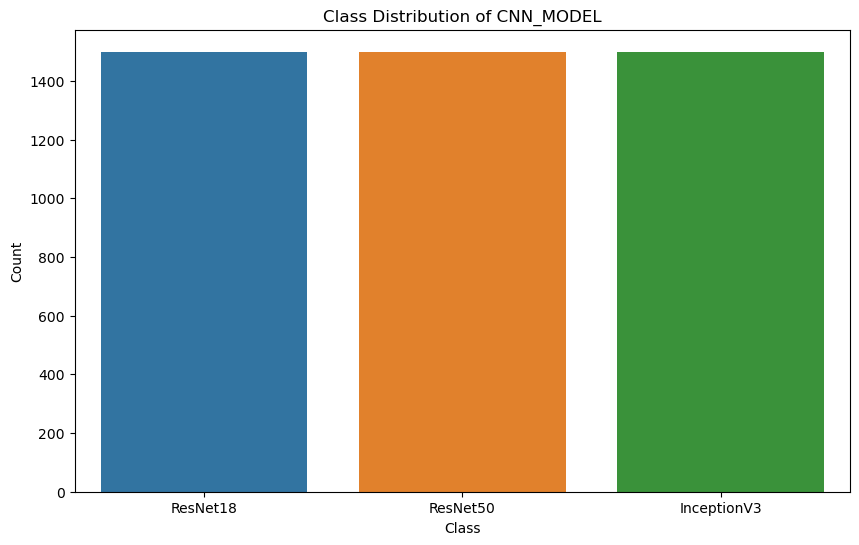

In [18]:
# Check class distribution of CNN MODEL in the resampled dataset
cnn_counts = merged_df['CNN_MODEL'].value_counts()
print(cnn_counts)

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=cnn_counts.index, y=cnn_counts.values)
plt.title('Class Distribution of CNN_MODEL')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

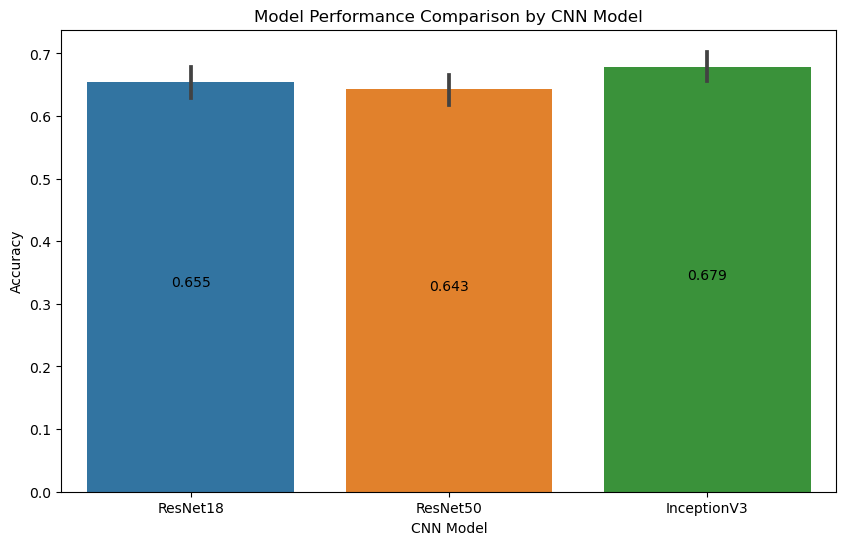

In [19]:
# Model Performance Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='CNN_MODEL', y='ACCURACY', data=merged_df)

plt.title('Model Performance Comparison by CNN Model')
plt.xlabel('CNN Model')
plt.ylabel('Accuracy')

# Add labels for each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height / 2 , f'{height:.3f}', ha='center')

plt.show()

#### Testing Accuracy by CNN Model and Epoch

20    2250
50    2250
Name: EPOCH, dtype: int64


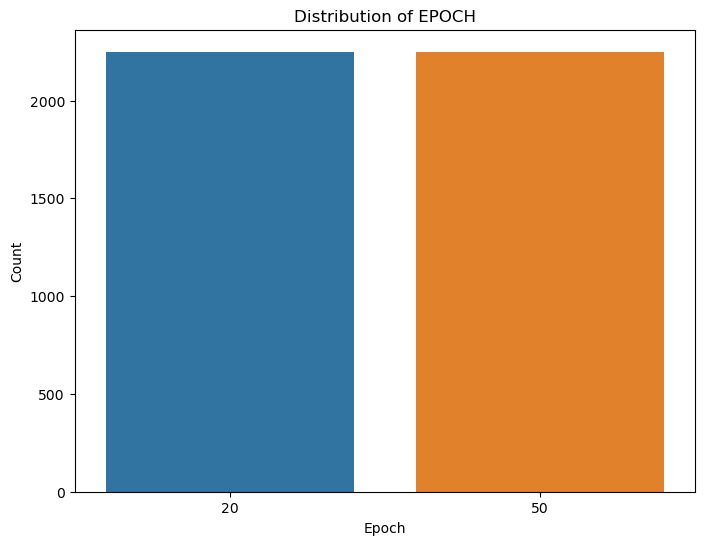

In [20]:
# Count the occurrences of each epoch
epoch_counts = merged_df['EPOCH'].value_counts()

print(epoch_counts)

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=epoch_counts.index, y=epoch_counts.values)
plt.title('Distribution of EPOCH')
plt.xlabel('Epoch')
plt.ylabel('Count')
plt.show()

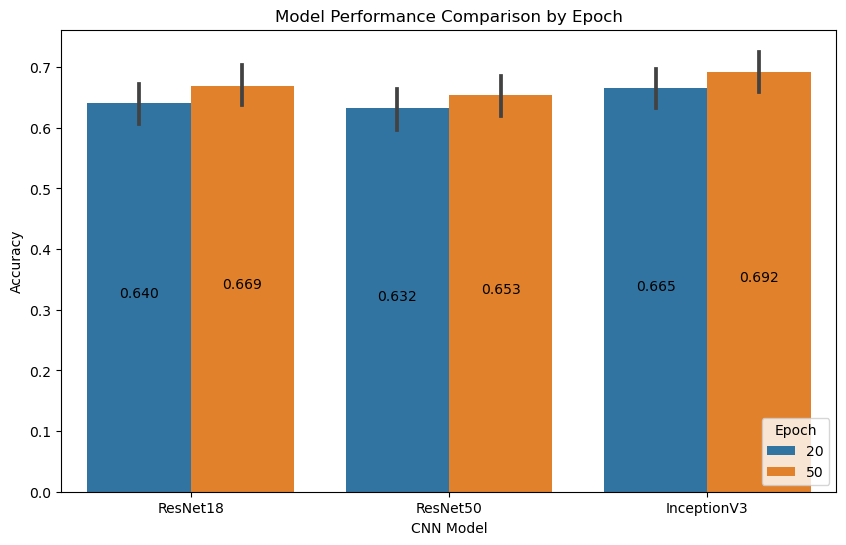

In [21]:
# Model Performance Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='CNN_MODEL', y='ACCURACY', hue='EPOCH', data=merged_df)

plt.title('Model Performance Comparison by Epoch')
plt.xlabel('CNN Model')
plt.ylabel('Accuracy')

# Add labels for each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height / 2 , f'{height:.3f}', ha='center')

plt.legend(title='Epoch', loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

#### Testing Accuracy by Data Size and CNN Model

500     1500
1000    1500
2000    1500
Name: DATA_SIZE, dtype: int64


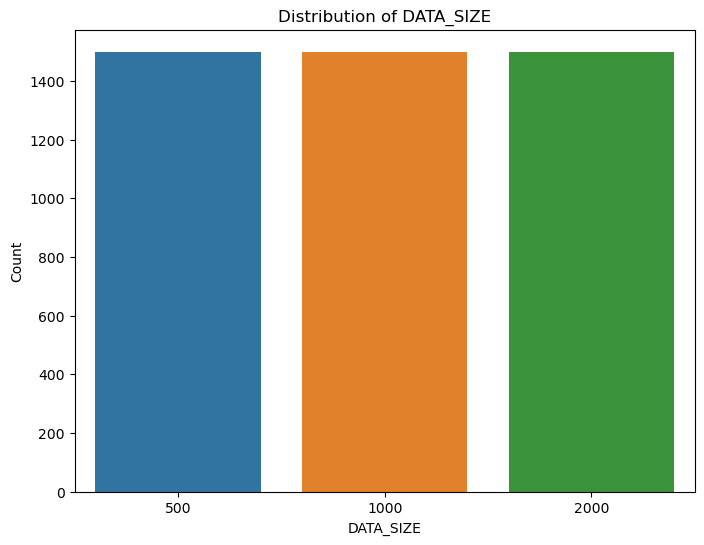

In [22]:
# Count the occurrences of each cnn_model
data_counts = merged_df['DATA_SIZE'].value_counts()
print(data_counts)

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=data_counts.index, y=data_counts.values)
plt.title('Distribution of DATA_SIZE')
plt.xlabel('DATA_SIZE')
plt.ylabel('Count')
plt.show()

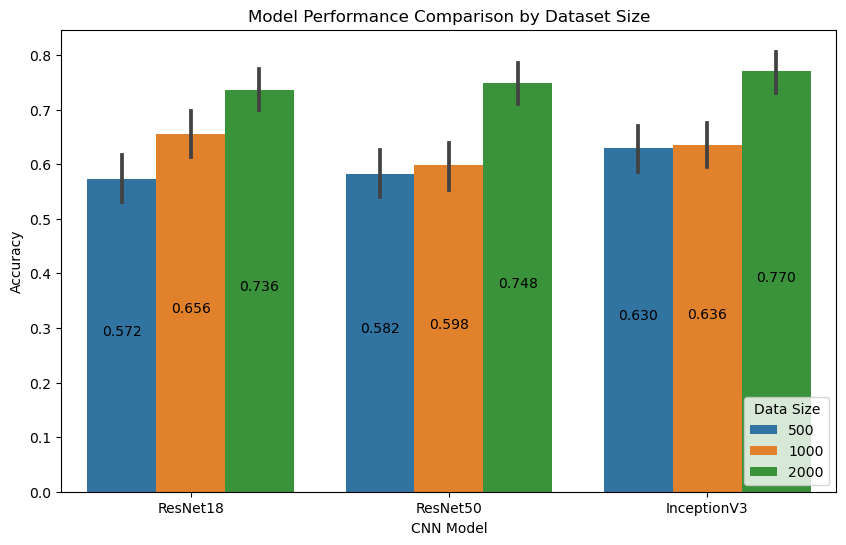

In [23]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'merged_df'
plt.figure(figsize=(10, 6))
sns.barplot(x='CNN_MODEL', y='ACCURACY', hue='DATA_SIZE', data=merged_df)

plt.title('Model Performance Comparison by Dataset Size')
plt.xlabel('CNN Model')
plt.ylabel('Accuracy')

# Add labels for each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height / 2 , f'{height:.3f}', ha='center')

plt.legend(title='Data Size', loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

#### Testing Accuracy by Data Size, Epoch and CNN Model

In [ ]:
# Create two separate plots for each epoch
for epoch in merged_df['EPOCH'].unique():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='CNN_MODEL', y='ACCURACY', hue='DATA_SIZE', 
                data=merged_df[merged_df['EPOCH'] == epoch])

    plt.title(f'Model Performance Comparison by Data Size (Epoch {epoch})')
    plt.xlabel('CNN Model')
    plt.ylabel('Accuracy')

    # Add labels for each bar
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height /2, f'{height:.3f}', ha='center')

    plt.legend(title='Data Size', loc='lower right', bbox_to_anchor=(1, 0))

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame

# Get unique epochs
epochs = merged_df['EPOCH'].unique()

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

for i, epoch in enumerate(epochs):
    ax = axs[i]
    sns.barplot(x='CNN_MODEL', y='ACCURACY', hue='DATA_SIZE',
                data=merged_df[merged_df['EPOCH'] == epoch], ax=ax)

    ax.set_title(f'Model Performance Comparison by Data Size (Epoch {epoch})')
    ax.set_xlabel('CNN Model')
    ax.set_ylabel('Accuracy')

    # Add labels for each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height / 2, f'{height:.3f}', ha='center')

    ax.legend(title='Data Size', loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()

### Model Confidence Analysis

In [ ]:
# Model Confidence Analysis
sns.boxplot(x='CNN_MODEL', y='CONFIDENCE', hue='MATCH', data=merged_df)
plt.title('Model Confidence Analysis')
plt.xlabel('CNN Model')
plt.ylabel('Confidence')
plt.show()

### Error Analysis

##### Create a Subset of the Data

In [ ]:
# Create a subset of the data
subset_df = merged_df[['IMAGE_NAME', 'ACTUAL_IMAGE', 'CNN_MODEL', 'MATCH']]

# Print the first few rows of the subset for verification
print(subset_df.head())

In [ ]:
# Get the size of the dataset (number of rows and columns)
num_rows, num_cols = subset_df.shape
print(f"Number of rows in the dataset: {num_rows}")
print(f"Number of columns in the dataset: {num_cols}")

#### Error Analysis by CNN Model

In [ ]:
# Error Analysis
error_df_cnn = subset_df[subset_df['MATCH'] == 'NO']
sns.countplot(x='CNN_MODEL', data=error_df_cnn)
plt.title('Error Analysis by CNN Model')
plt.xlabel('CNN Model')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the total count of predictions for each model
total_predictions = subset_df['CNN_MODEL'].value_counts()

# Calculate the total count of errors for each model
error_counts = error_df_cnn['CNN_MODEL'].value_counts()

# Calculate the percentage of errors within each model
error_percentages = (error_counts / total_predictions) * 100

# Plot the error count and percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=error_percentages.index, y=error_percentages.values)
plt.title('Error Analysis by CNN Model')
plt.xlabel('CNN Model')
plt.ylabel('Error Percentage')


# Add labels for each class
for i, patch in enumerate(plt.gca().patches):
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, patch.get_y() + height /2,
                 f"{height:.1f}%", ha='center', va='center', color='black', fontsize=10)
        
plt.show()

#### Error Analysis by Class and CNN Model

##### Check Class Distribution

In [ ]:
# Count the occurrences of each class
class_counts = subset_df['ACTUAL_IMAGE'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of ACTUAL_IMAGE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Error Analysis
error_df = subset_df[subset_df['MATCH'] == 'NO']
sns.countplot(x='CNN_MODEL', hue='ACTUAL_IMAGE', data=error_df)
plt.title('Error Analysis by CNN Model and Actual Image (Balanced Classes)')
plt.xlabel('CNN Model')
plt.ylabel('Count')
plt.show()

##### Normalize the Chart Using Percentages

In [ ]:
# Count the errors in each class within each CNN model
error_count = error_df.groupby(['CNN_MODEL', 'ACTUAL_IMAGE']).size().reset_index(name='ERROR_COUNT')

# Calculate the total errors for each CNN model
total_errors = error_count.groupby('CNN_MODEL')['ERROR_COUNT'].transform('sum')

# Calculate the percentage of errors in each class within each CNN model
error_count['ERROR_PERCENTAGE'] = (error_count['ERROR_COUNT'] / total_errors) * 100

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CNN_MODEL', y='ERROR_PERCENTAGE', hue='ACTUAL_IMAGE', data=error_count)

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}%', ha='center')

plt.title('Error Analysis by CNN Model & Class (Balanced Classes)')
plt.xlabel('CNN Model')
plt.ylabel('Error Percentage')
plt.show()